# Course - Data Analysis using Python 3 - MSc CA[DS] SEM2
### PRN - 18030142043
### Assignment 1
### Name - Subodh Dharmadhikari

# Rainfall Data Analysis - Indian Weather

### Checkung if datafile has any null values.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/mac/Desktop/datafile.csv')
df.isnull().any().unique()

array([False])

#### Datafile does not contain any null values 

# Solution


### Answer 1 - 

In [2]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN+FEB', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [3]:
mwise = df.loc[:,'JAN':'DEC',].sum()
mwise 

JAN     11744.8
FEB     13436.3
MAR     19240.5
APR     29144.3
MAY     52092.3
JUN    125310.5
JUL    208699.9
AUG    186411.1
SEP    124581.3
OCT     57819.0
NOV     21751.6
DEC     11575.9
dtype: float64

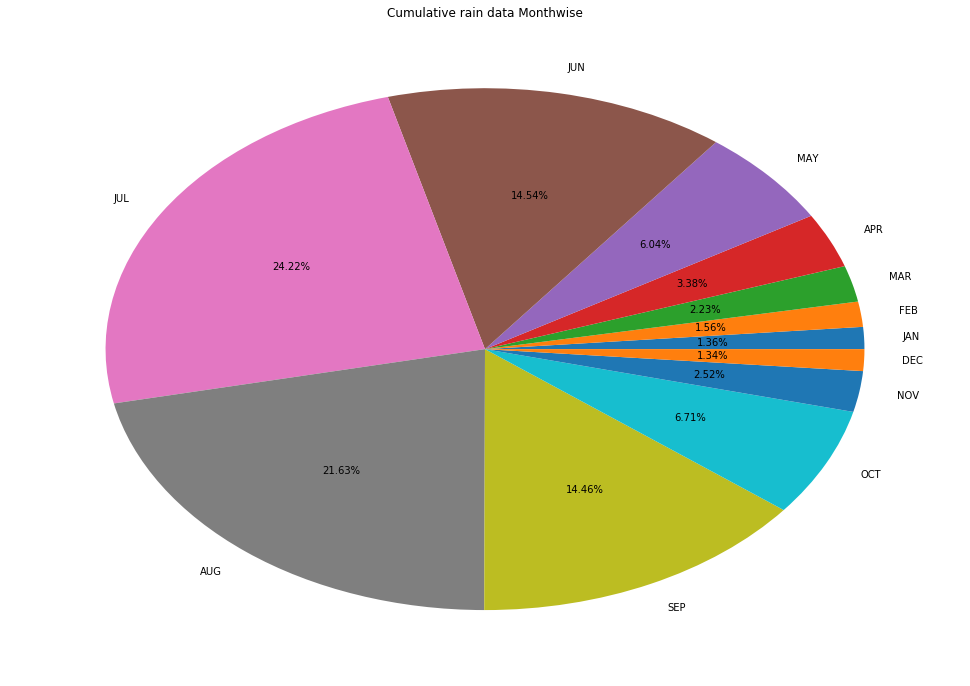

In [4]:
plt.figure(figsize = (17,12))
plt.pie(
        mwise,
        labels = mwise.index,
        autopct='%.2f%%'  
        )
plt.title("Cumulative rain data Monthwise") 
plt.show()

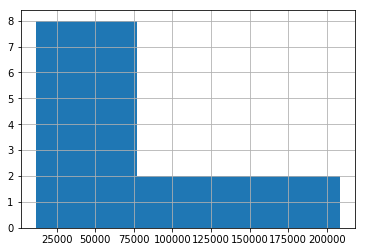

In [5]:
mwise.hist(bins = 3)
plt.show()

### Rainfall distribution is skewed so we have to take median to find out states where rainfall is more in rainy season in particular year.

### Answer 2 -

In [6]:
states = df.iloc[:,0].unique()
states

array(['ANDAMAN And NICOBAR ISLANDS', 'ARUNACHAL PRADESH', 'ASSAM',
       'MEGHALAYA', 'MANIPUR', 'MIZORAM', 'NAGALAND', 'TRIPURA',
       'WEST BENGAL', 'SIKKIM', 'ORISSA', 'JHARKHAND', 'BIHAR',
       'UTTAR PRADESH', 'UTTARANCHAL', 'HARYANA', 'CHANDIGARH', 'DELHI',
       'PUNJAB', 'HIMACHAL', 'JAMMU AND KASHMIR', 'RAJASTHAN',
       'MADHYA PRADESH', 'GUJARAT', 'DADAR NAGAR HAVELI', 'DAMAN AND DUI',
       'MAHARASHTRA', 'GOA', 'CHATISGARH', 'ANDHRA PRADESH', 'TAMIL NADU',
       'PONDICHERRY', 'KARNATAKA', 'KERALA'], dtype=object)

#### Plotting rainfall statewise MEDIAN - focusing on RAINY season

In [7]:
stgroups = df.groupby(['STATE/UT']).median()
stwisem = stgroups['ANNUAL']
stwisem

STATE/UT
ANDAMAN And NICOBAR ISLANDS    2913.30
ANDHRA PRADESH                  979.80
ARUNACHAL PRADESH              3043.80
ASSAM                          2485.30
BIHAR                          1141.15
CHANDIGARH                     1070.60
CHATISGARH                     1292.85
DADAR NAGAR HAVELI             2374.10
DAMAN AND DUI                  1535.70
DELHI                           747.10
GOA                            3278.50
GUJARAT                         820.60
HARYANA                         544.00
HIMACHAL                       1307.50
JAMMU AND KASHMIR              1050.80
JHARKHAND                      1272.70
KARNATAKA                       791.80
KERALA                         2994.15
MADHYA PRADESH                 1028.55
MAHARASHTRA                     961.10
MANIPUR                        1922.60
MEGHALAYA                      2554.40
MIZORAM                        2660.00
NAGALAND                       2080.00
ORISSA                         1465.55
PONDICHERRY     

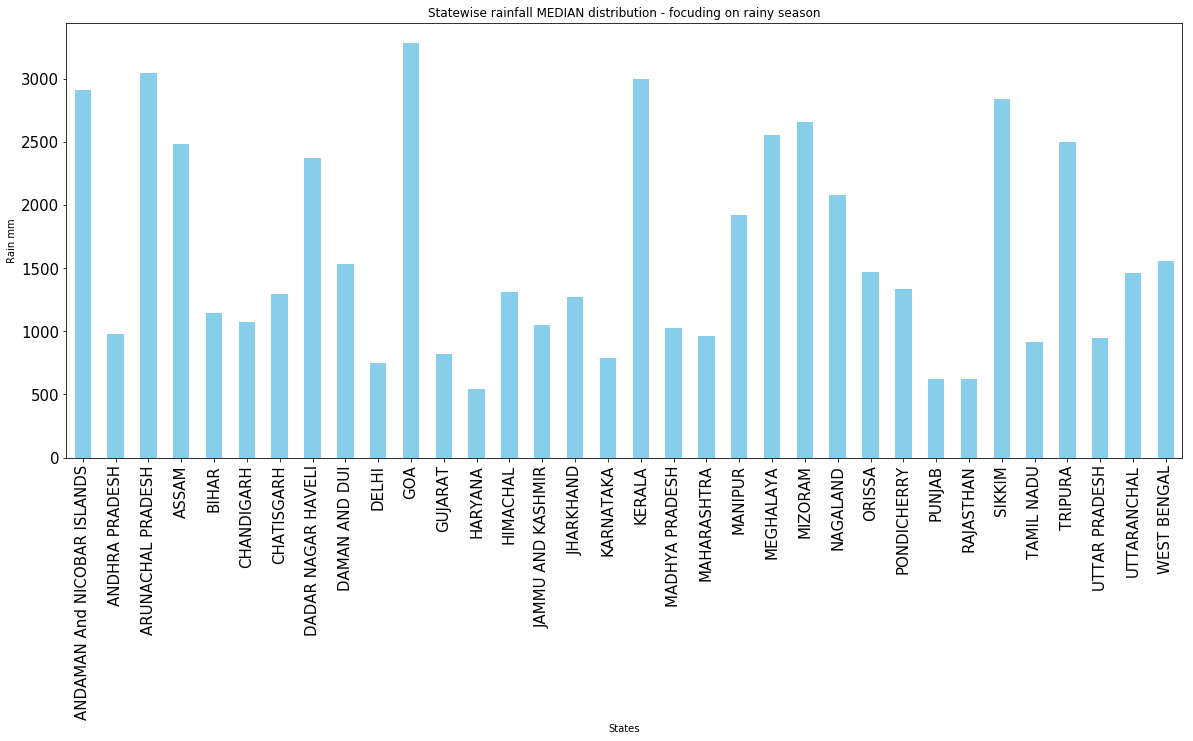

In [8]:
stwisem.plot(kind='bar',fontsize =15,figsize=(20,8),align='center',color = 'skyblue')
plt.title("Statewise rainfall MEDIAN distribution - focuding on rainy season")
plt.xlabel("States") 
plt.ylabel("Rain mm") 
plt.show()

#### Plotting sum statewise (Cumulative - Total rainfall over the period of year)

In [9]:
stgroups = df.groupby(['STATE/UT']).sum()
stwise = stgroups['ANNUAL']
stwise

STATE/UT
ANDAMAN And NICOBAR ISLANDS     8734.2
ANDHRA PRADESH                 21736.7
ARUNACHAL PRADESH              46838.0
ASSAM                          66267.7
BIHAR                          45621.1
CHANDIGARH                      1070.6
CHATISGARH                     23154.3
DADAR NAGAR HAVELI              2374.1
DAMAN AND DUI                   3071.4
DELHI                           6723.9
GOA                             6557.0
GUJARAT                        24032.9
HARYANA                        12905.7
HIMACHAL                       16459.1
JAMMU AND KASHMIR              22365.6
JHARKHAND                      31282.5
KARNATAKA                      35838.5
KERALA                         41123.5
MADHYA PRADESH                 51615.5
MAHARASHTRA                    44750.6
MANIPUR                        22469.7
MEGHALAYA                      25779.9
MIZORAM                        23546.9
NAGALAND                       21347.7
ORISSA                         43983.6
PONDICHERRY     

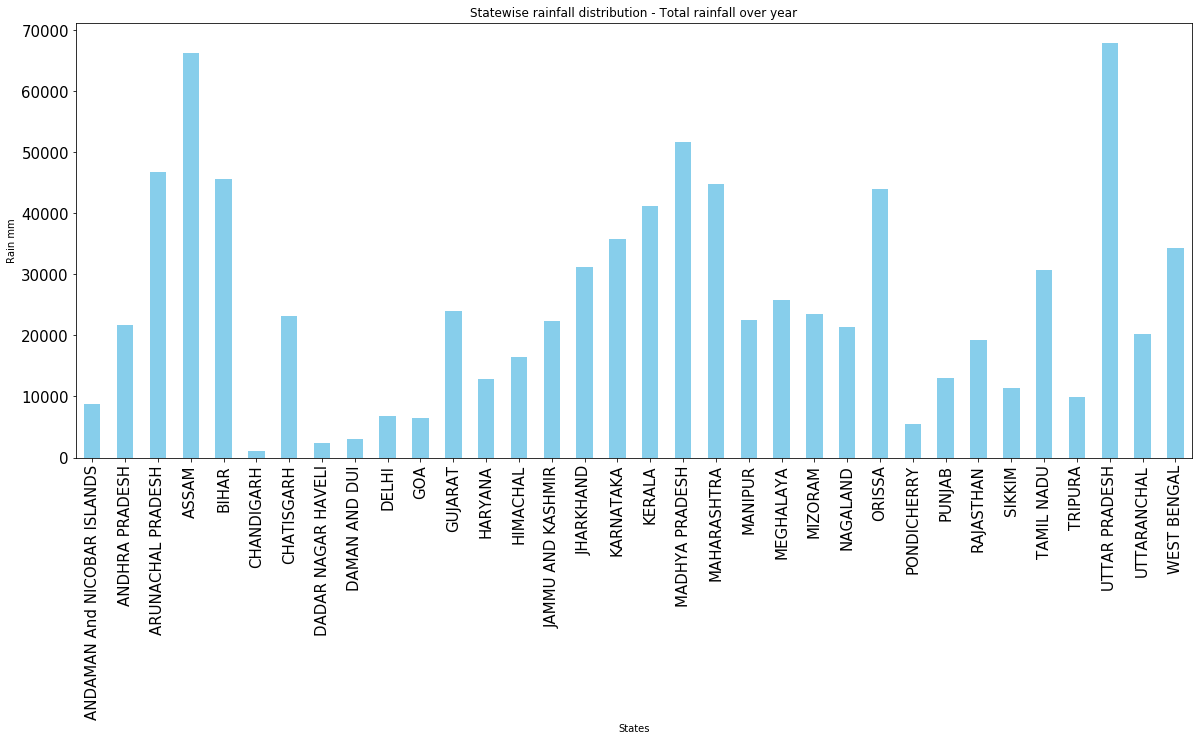

In [10]:
stwise.plot(kind='bar',fontsize =15,figsize=(20,8),align='center',color = 'skyblue')
plt.title("Statewise rainfall distribution - Total rainfall over year")
plt.xlabel("States") 
plt.ylabel("Rain mm") 
plt.show()

### Answer 3 - 
### Monthwise rain graph

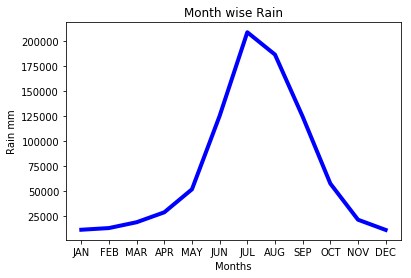

In [11]:
plt.plot(mwise.index,mwise,color='blue', linewidth=4)
plt.title("Month wise Rain")
plt.xlabel("Months") 
plt.ylabel("Rain mm") 
plt.show()

### Lowest 5 rainfall states based on annual rain

In [12]:
lowestrain = stwise.sort_values().head(5)
lowestrain

STATE/UT
CHANDIGARH            1070.6
DADAR NAGAR HAVELI    2374.1
DAMAN AND DUI         3071.4
PONDICHERRY           5513.9
GOA                   6557.0
Name: ANNUAL, dtype: float64

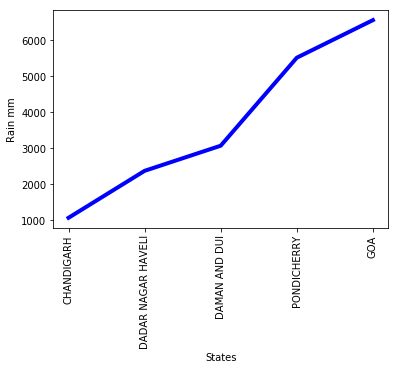

In [13]:
plt.plot(lowestrain,color='blue', linewidth=4)
plt.xticks(rotation=90)
plt.xlabel("States") 
plt.ylabel("Rain mm")
plt.show()

### Answer 4 - 
### Median is basically average central value of distrubuted values - to handle skewed distribution

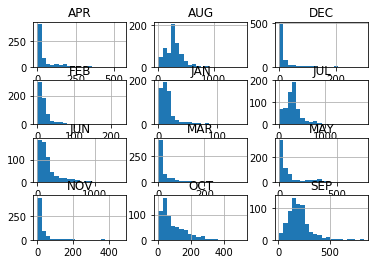

In [14]:
df.loc[:,'JAN':'DEC'].hist(bins = 20)
plt.show()

### This represents skewed distribution in each month  thatswhy we have to take median.

In [15]:
medianrain = df.loc[:,'JAN':'DEC'].median()
medianrain

JAN     13.30
FEB     12.30
MAR     12.70
APR     15.05
MAY     33.85
JUN    131.70
JUL    293.90
AUG    284.95
SEP    181.40
OCT     62.50
NOV     12.90
DEC      7.90
dtype: float64

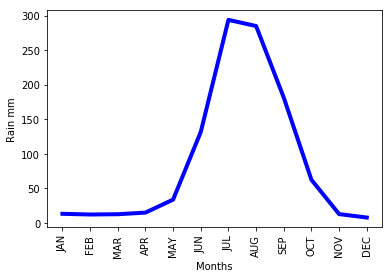

In [16]:
plt.plot(medianrain,color='blue', linewidth=4)
plt.xticks(rotation=90)
plt.xlabel("Months")
plt.ylabel("Rain mm") 
plt.show()